***notebook này tập trung vào việc áp dụng kĩ thuật Stacked Generalization để nâng cao độ chính xác mô hình***


***references:***
- https://viblo.asia/p/lam-chu-stacking-ensemble-learning-Az45b0A6ZxY

***nội dung:***

0. báo cáo công việc và kết quả
1. Basic stacking Ensemble Learning
2. Stacking với Cross-Validation
3. Multi-levels Stacking
4. voting classifier
5. Weighted Average Ensemble
6. Blending Ensemble
7. ngoài lề: kĩ thuật ensemble trong bài toán regression

# 0. báo cáo công việc và kết quả

- các phướng pháp stacking generalization techniques là những thuật toán machine learning mạnh mẽ, trong notebook này tập trung ứng dụng các kĩ kĩ thuật stacking và các biến thể mạnh mẽ của nó để cải thiện hiệu suất mô hình trên bộ dữ liệu cũ


1. ứng dụng các kĩ thuật staking ensemble learning đơn giản
    - kĩ thuật stacking cơ bản:
        + sử dụng LogisticRegression, DecisionTreeClassifier, SVC, RandomForestClassifier để làm mô hình cơ sở (base models)
        + sử dụng LogisticRegression làm mô hình ảo (meta model) để phân loại đầu ra

        => kết quả: độ chính xác có cải thiện (tăng 6% so với kết quả trước đây đối với mô hình RF)

2. kĩ thuật stacking với cross-validation
    - sử dụng kĩ thuật stacking với cross-validation để giảm thiểu overfiting trên phương pháp 1:
        + cross-validation với 5-fold
        + base models: DecisionTreeClassifier, SVC, RandomForestClassifier
        + meta model: LogisticRegression

        => kết quả: độ chính xác cải thiện (tăng 6% so với kết quả trước đây đối với mô hình RF, không tăng so với phương pháp 1)

3. kĩ thuật multi-levels stacking
    - phát triển từ phương pháp 2 với số lượng tầng meta model tăng lên (từ 1 tăng lên 2)
        + base models lv1:DecisionTreeClassifier, SVC, RandomForestClassifier
        + meta models với 2 levels: đều dung LogisticRegression
        + base models lv2: level1_stacking, RandomForestClassifier, 
    

        => độ chính xác tăng so với phương pháp truyền thống trước đây, tăng không đáng kể so với phương pháp 2

4. kĩ thuật voting classifier
    - phương pháp: sử dụng hard voting (dựa trên số lượng dự đoán đầu ra) và soft voting (dựa trên xác suất dự đoán đầu ra)
    - phương pháp hard-voting:
        + base models: DecisionTreeClassifier, SVC, RandomForestClassifier
        + voting: hard

        => kết quả: độ chính xác tăng đáng kể (đạt 84%, cao nhất từ trước tới nay, tăng trung bình so với các thuật toán khác là 5%, tăng nhiều nhất so với kfold là 9%, tăng ít nhất là 2% so với mô hình catboost)
        
    - phương pháp soft-voting:
        + base models: DecisionTreeClassifier, SVC, RandomForestClassifier
        + voting: soft
   
        => kết quả: độ chính xác tăng khong đáng kể so với các phương pháp cũ, đạt 81%

5. kĩ thuật weighted average ensemble
    - các base models được sử dụng: XGB_pred + KNN_pred + MLPC_pred + DecisionTree_pred + RandomForest_pred
    - giả định 1: các mô hình quan trọng như nhau
        + độ chính xác tăng
    - giả đinhk 2: mỗi mô hình có trọng số riêng (tầm quan trọng khác nhau)
        + độ chính xác tăng

6. kĩ thuật blending ensemble
    - blending đối với hard-voting:
        + base models: LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVC, GaussianNB
        + độ chính xác tăng đáng kể: đạt 83%
    -blending đối với soft-voting:
        + base models: LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVC, GaussianNB
        + độ chính xác tăng ít/ không tăng đối với các mô hình trước đây: đạt 81%

7. tổng kết
    - đạt được:
        + sử dụng da dạng các phiên bản và biến thể của stacking generalization
        + cải thiện được độ chính xác trên tập dữ liệu cũ

    - chưa đạt được:
        + tổng quan kết quả vẫn còn cần cải thiện thêm nữa

# 1. Basic stacking Ensemble Learning

***ý tưởng cơ bản:***
- ý tưởng cơ bản của thuật toán này là thay vì dùng một mô hình machine learning đơn giản thì ta kết hợp các mô hình machine learning khác lại để có được dự đoán mạnh hơn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
df = pd.read_csv("E:/IAD/INTERN/01_diabetes/data/diabetes.csv")
# df.head()
# print(len(df.columns))
# print(y_test.columns)

In [3]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [12]:
# create base models
base_model = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]


# create meta model
meta_model = LogisticRegression()


# create stacking model
stacking_model = StackingClassifier(estimators=base_model, final_estimator=meta_model)


stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracu = {accuracy}')


accuracu = 0.8181818181818182


# 2. Stacking với Cross-Validation

***điểm chú ý:***
- tạo ra nhiều test set và kết hợp chúng lại

***cơ chế:***
- chia tập dữ liệu thành k tập (k-fold)
- đối với mỗi mô hình, dùng k-1 tập để huấn luyện, 1 tập còn lại để kiểm thử mô hình
- dự đoán 1 phần còn lại đó và cả trên test set
- tổng hợp các kết quả chạy được (bao gồm cả kết quả test trên 1 fold và cả test set trên các mô hình)
- nếu bài toán cần giải quyết là regression thì ta tính mean còn class thì ta sử dụng voting để đưa ra kết quả cuối cùng

In [13]:
# create base models
base_model = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]


# create meta model
meta_model = LogisticRegression()


# create stacking model
stacking_model = StackingClassifier(estimators=base_model, final_estimator=meta_model, cv=5) # 5-fold cross-validation


stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracu = {accuracy}')


accuracu = 0.8116883116883117


# 3. Multi-levels Stacking

***cơ chế:***
- sau khi huấn luyện sử dụng phương pháp stacking (based models - level 0 và meta model - level1)
- thì thay vì chỉ có 1 lớp meta model thì bây giờ thêm nhiều meta models và các tầng meta models

In [15]:
level1_models = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]
level1_meta_model = LogisticRegression()
level1_stacking = StackingClassifier(estimators=level1_models, final_estimator=level1_meta_model, cv=5)
level1_stacking.fit(x_train, y_train)


# level 2
level2_models = [
    ('level1_stacking_model', level1_stacking),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True))
]
level2_stacking_model = LogisticRegression()
level2_stacking = StackingClassifier(estimators=level2_models, final_estimator=level2_stacking_model, cv=5)
level2_stacking.fit(x_train, y_train)

y_pred = level2_stacking.predict(x_test)
accuracu = accuracy_score(y_test, y_pred)
print(f'accuracyu = {accuracy}')


accuracyu = 0.8116883116883117


# 4. voting classifier

https://machinelearningmastery.com/voting-ensembles-with-python/

***cơ chế:***
- sử dụng phương pháp thống kê đơn giản
- voting sẽ dử dụng hard-voting được predicted nhiều nhất
- hoặc soft-voting được predicted với class có tổng xác suất cao nhất 
- trong voting, các based models được giả định có độ quan trọng như nhau

In [94]:
from sklearn.ensemble import VotingClassifier


base_models = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]   

meta_model = VotingClassifier(estimators=base_models)
meta_model.fit(x_train, y_train)
pred = meta_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'accuracy = {accuracy}')


accuracy = 0.8441558441558441


In [98]:
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]   

meta_model = VotingClassifier(estimators=base_models, voting='hard')
meta_model.fit(x_train, y_train)
pred = meta_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'accuracy = {accuracy}')


accuracy = 0.8376623376623377


In [100]:
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('rf', RandomForestClassifier())
]   

meta_model = VotingClassifier(estimators=base_models, voting='soft')
meta_model.fit(x_train, y_train)
pred = meta_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print(f'accuracy = {accuracy}')


accuracy = 0.8116883116883117


name = knn1, mean = 0.6766404647983596, std = 0.05627723759360064
name = knn3, mean = 0.6962292093871042, std = 0.04791392086663333
name = knn5, mean = 0.7174698108908635, std = 0.03957102555584292
name = knn7, mean = 0.7252620186830714, std = 0.0446881681408015
name = knn9, mean = 0.7348086124401915, std = 0.04471529175902817
name = hard_voting, mean = 0.718324219640009, std = 0.04931925746433479


C:\Users\JOS UC\AppData\Local\Temp\ipykernel_3156\1027644249.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


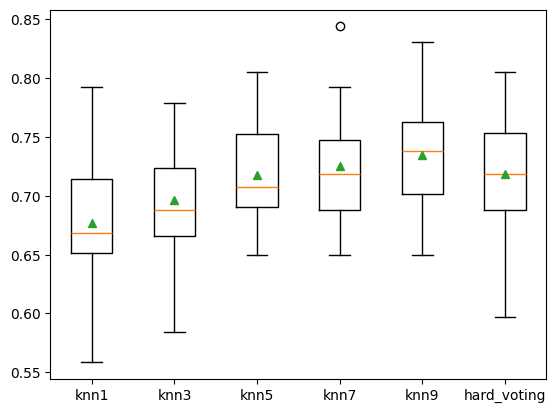

In [109]:
from numpy import mean, std
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

def get_voting():
    # define the base models
    model = list()
    model.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
    model.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
    model.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
    model.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
    model.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=model, voting='hard')
    return ensemble  # Return the ensemble model, not the list of models

def get_models():
    # get a list of model to evaluate
    models = dict()
    models['knn1'] = KNeighborsClassifier(n_neighbors=1)
    models['knn3'] = KNeighborsClassifier(n_neighbors=3)
    models['knn5'] = KNeighborsClassifier(n_neighbors=5)
    models['knn7'] = KNeighborsClassifier(n_neighbors=7)
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['hard_voting'] = get_voting()
    return models

def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# Assuming X and y are your feature matrix and target vector respectively
# X, y = your_data_loading_function()

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x, y)
    results.append(scores)
    names.append(name)
    print(f'name = {name}, mean = {mean(scores)}, std = {std(scores)}')

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()



# 5. Weighted Average Ensemble
https://medium.com/analytics-vidhya/simple-weighted-average-ensemble-machine-learning-777824852426

***cơ chế:***
- sử dụng một tập hợp các based models để thực hiện dự đoán
- dựa trên cơ chế là đánh giá các trọng số của based models (ví dụ dựa trên accuracy, performence...)
- đầu ra là từng trọng số của mô hình nhân với predictions của nó

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
"""The target variable is binary, either 0 (didn’t purchase) or 1 (Quote converted)."""

# Decision Tree
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
DecisionTree_pred = DecisionTree.predict(x_test)
print(DecisionTree_pred)
# DecisionTreePrediction = pd.DataFrame(
#     {'QuoteNumber': y_test},
#     {'QuoteConversion_Flag': DecisionTree_pred}
# )

[1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0
 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0]


In [21]:
# Decision Tree
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
DecisionTree_pred = DecisionTree.predict(x_test)
DecisionTreePrediction = pd.DataFrame(
    {'QuoteNumber': y_test,
    'QuoteConversion_Flag': DecisionTree_pred}
)
DecisionTreePrediction.to_csv('DecisionTreePrediction.csv', index=False)


# KNN
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)
KNNPrediction = pd.DataFrame(
    {'QuoteNumber': y_test,
    'QuoteConversion_Flag': KNN_pred}
)
KNNPrediction.to_csv('KNNPrediction.csv', index=False)


# MLPC
MLPC = MLPClassifier(random_state=1, max_iter=100)
MLPC.fit(x_train, y_train)
MLPC_pred = MLPC.predict(x_test)
MLPCPrediction = pd.DataFrame(
    {'QuoteNumber': y_test,
    'QuoteConversion_Flag': MLPC_pred}
)
MLPCPrediction.to_csv('MLPCPrediction.csv', index=False)


# Random Forest
RandomForest = RandomForestClassifier()
RandomForest.fit(x_train, y_train)
RandomForest_pred = RandomForest.predict(x_test)
RandomForestPrediction = pd.DataFrame(
    {'QuoteNumber': y_test,
    'QuoteConversion_Flag': RandomForest_pred}
)
RandomForestPrediction.to_csv('RandomForestPrediction.csv', index=False)


# XGB classifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGB_pred = XGB.predict(x_test)
XGBPrediction = pd.DataFrame(
    {'QuoteNumber': y_test,
    'QuoteConversion_Flag': XGB_pred}
)
XGBPrediction.to_csv('XGBPrediction.csv', index=False)

print('done!')

done!


In [23]:
# average weights
average_pred = (XGB_pred + KNN_pred + MLPC_pred + DecisionTree_pred + RandomForest_pred) / 5

# make submission table
FiveModelAveragePrediction = pd.DataFrame(
    {'QuoteNumber': y_test,
     'QuoteConversion_Flag': average_pred}
)
FiveModelAveragePrediction.to_csv('FiveModelAveragePrediction.csv', index=False)

# weighted average
weighted_average = (0.3*XGB_pred + 0.2*KNN_pred + 0.2*MLPC_pred + 0.15*DecisionTree_pred + 0.15*RandomForest_pred)

# make submission table
WeightedAveragePrediction = pd.DataFrame(
    {'QouteNumber': y_test,
     'QuoteConversion_Flag': weighted_average}
)
WeightedAveragePrediction.to_csv('WeightedAveragePrediction.csv', index=False)

print('done!')

done!


# 6. Blending Ensemble
https://machinelearningmastery.com/blending-ensemble-machine-learning-with-python/

***tổng quan:***
- chia dataset thành 2 phần (sebset-1 và subset2)
- dùng subset-1 để huấn luyện các based models (KNN, Linear...)
- dùng subset-2 để thực hiện predict trên các based models đó ta có được predictions của subset-2
- từ các kết quả của predictions, ta dùng nó làm dữ liệu huấn luyện cho blender 

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from numpy import hstack
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [31]:
# FOR CLASSIFICATION

def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('svm', SVC()))
    models.append(('bayes', GaussianNB()))
    return models


# fit the blending ensemble
def fit_ensemble(models, x_train, y_train, x_test, y_test):
    # fit all models on the training dataset
    meta_x = list()
    for name, model in models:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        pred = pred.reshape(len(pred), 1)
        meta_x.append(pred)

    meta_x = hstack(meta_x)
    blender = LogisticRegression()
    blender.fit(meta_x, y_test)
    return blender


# make a prediction with the blending ensemble
def predict_ensemble(models, blender, x_test):
    meta_x = list()
    for name, model in models:
        pred = model.predict(x_test)
        pred = pred.reshape(len(pred), 1)
        meta_x.append(pred)

    meta_x = hstack(meta_x)
    return blender.predict(meta_x)


models = get_models()
blender = fit_ensemble(models, x_train, y_train, x_test, y_test)
pred = predict_ensemble(models, blender, x_test)
accuracy = accuracy_score(y_test, pred)
print(f'accuracy = {accuracy}')

accuracy = 0.8311688311688312


***bleding ensemble with soft voting***

In [ ]:
from numpy import hstack
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [38]:
# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('knn', KNeighborsClassifier()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('svm', SVC(probability=True)))
    models.append(('bayes', GaussianNB()))
    return models


def fit_ensemble(models, x_train, y_train, x_test, y_test):
    meta_x = list()
    for name, model in models:
        model.fit(x_train, y_train)
        pred = model.predict_proba(x_test)
        meta_x.append(pred)  

    meta_x = hstack(meta_x)
    blender = LogisticRegression()
    blender.fit(meta_x, y_test)
    return blender


def predict_ensemble(model, blender, x_test):
    meta_x = list()
    for name, model in models:
        pred = model.predict_proba(x_test)
        meta_x.append(pred)
    
    meta_x = hstack(meta_x)
    return blender.predict_proba(meta_x)


models = get_models()
blender = fit_ensemble(models, x_train, y_train, x_test, y_test)
pred = predict_ensemble(models, blender, x_test)
# print(pred)
pred_class = [np.argmax(i) for i in pred]
# print(pred_class)
accuracy = accuracy_score(y_test, pred_class)
print(f'accuracy = {accuracy}')

accuracy = 0.8181818181818182


***blending ensemble for regression***

In [58]:
# evaluate blending ensemble for regression
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [55]:
x = df['Glucose']
print(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64


# 7. ngoài lề: kĩ thuật ensemble trong bài toán regression

In [ ]:
# FOR REGRESSION

def get_dataset():
	x, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
	return x, y

# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LinearRegression()))
    models.append(('knn', KNeighborsRegressor()))
    models.append(('cart', DecisionTreeRegressor()))
    models.append(('svm', SVR()))
    return models


def fit_ensemble(models, x_train, y_train, x_test, y_test):
    meta_x = list()
    for name, model in models:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        meta_x.append(pred)
        pred = pred.reshape(len(pred), 1)
    
    meta_x = hstack(meta_x)
    blender = LinearRegression()
    blender.fit(pred, y_test)
    return blender


def predict_ensemble(model, blender, x_test):
    meta_x = list()
    for name, model in models:
        pred = model.predict(x_test)
        pred = pred.reshape(len(pred), 1)
        meta_x.append(pred)

    meta_x = hstack(meta_x)
    return blender.predict(meta_x)


x, y = get_dataset()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
models = get_models()
blender = fit_ensemble(models, x_train, y_train, x_test, y_test)
pred = predict_ensemble(models, blender, x_test)
# print(pred)
accuracy = mean_absolute_error(y_test, pred)
print(f'accuracy = {accuracy}')

In [61]:
# example of making a prediction with a blending ensemble for regression
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
	return X, y

# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LinearRegression()))
	models.append(('knn', KNeighborsRegressor()))
	models.append(('cart', DecisionTreeRegressor()))
	models.append(('svm', SVR()))
	return models

# fit the blending ensemble
def fit_ensemble(models, X_train, X_val, y_train, y_val):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for _, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_val)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LinearRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_val)
	return blender

# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for _, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)

# define dataset
X, y = get_dataset()
# split dataset set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize data split
print('Train: %s, Val: %s' % (X_train.shape, X_val.shape))
# create the base models
models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_val, y_train, y_val)
# make a prediction on a new row of data
row = [-0.24038754, 0.55423865, -0.48979221, 1.56074459, -1.16007611, 1.10049103, 1.18385406, -1.57344162, 0.97862519, -0.03166643, 1.77099821, 1.98645499, 0.86780193, 2.01534177, 2.51509494, -1.04609004, -0.19428148, -0.05967386, -2.67168985, 1.07182911]
yhat = predict_ensemble(models, blender, [row])
# summarize prediction
print('Predicted: %.3f' % (yhat[0]))

Train: (6700, 20), Val: (3300, 20)
Predicted: 359.986
